In [37]:
%reload_ext autoreload
%autoreload 2

from analyze import mult_sim_analysis
from constants import out_file_path
from si_types import OutputParameters

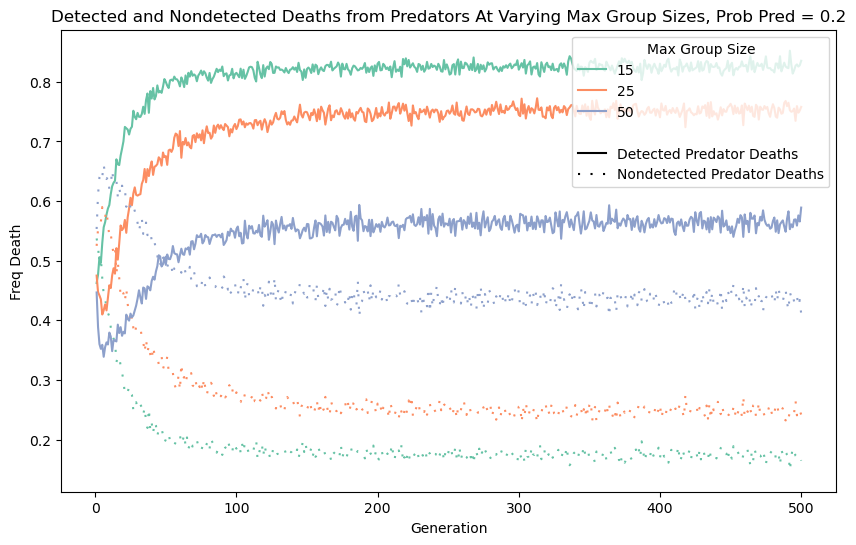

In [38]:
params = [
  OutputParameters(max_group_size=15, group_bin_size=3),
  OutputParameters(max_group_size=25, group_bin_size=5),
  OutputParameters(max_group_size=50, group_bin_size=10),
]

mult_sim_analysis(
  out_file_path=out_file_path,
  all_params=params,
  plots=[
    # "flight_freq_by_group_size",
    # "fitness",
    # "all_mean_trait_values",
    # "avg_flight_across_pred",
    # "avg_flight_across_group_size",
    "detected_nondetected_pred_deaths"
  ]
)
